In [4]:
#!conda install -c conda-forge rdkit

In [1]:
from tqdm import tqdm
import requests
import pandas as pd
import numpy as np
import os
import rdkit

In [8]:
directory_to_check = "data/binders"

empty_csv_files = []

# --- Prolazak kroz direktorijum ---
print(f"Proveravam CSV fajlove u direktorijumu: {os.path.abspath(directory_to_check)}\n")

# Proverite da li direktorijum postoji
if not os.path.isdir(directory_to_check):
    print(f"Greška: Direktorijum '{directory_to_check}' ne postoji.")
else:
    # Iterirajte kroz sve fajlove u navedenom direktorijumu
    for filename in os.listdir(directory_to_check):
        if filename.endswith(".csv"):
            file_path = os.path.join(directory_to_check, filename)
            
            print(f"Proveravam fajl: {filename}")
            
            try:
                # Pokušajte da učitate CSV fajl u DataFrame
                # 'header=None' sprečava grešku ako je fajl potpuno prazan (bez redova, bez headera)
                # 'skip_blank_lines=True' pomaže kod fajlova koji sadrže samo prazne linije
                df = pd.read_csv(file_path, header=None, skip_blank_lines=True)
                
                # Proverite da li je DataFrame prazan (nema redova)
                if df.empty:
                    empty_csv_files.append(file_path)
                    #print(f"  --> PAZITE: Fajl je prazan.")
                else:
                    # Možete dodati i proveru broja kolona/redova ako želite detaljnije
                    # print(f"  Fajl nije prazan. Redova: {len(df)}, Kolona: {len(df.columns)}")
                    print(f"  Fajl sadrži podatke.")

            except pd.errors.EmptyDataError:
                # Ova greška se javlja ako je CSV fajl potpuno prazan (0 bajtova)
                empty_csv_files.append(file_path)
                #print(f"  --> PAZITE: Fajl je prazan (EmptyDataError).")
            except Exception as e:
                # Uhvatite druge potencijalne greške pri čitanju CSV-a
                pass
                #print(f"  Greška prilikom čitanja '{filename}': {e}")

# --- Rezultati provere ---
print("\n--- Rezultati ---")
if empty_csv_files:
    print("Sledeći CSV fajlovi su prazni:")
    for empty_file in empty_csv_files:
        print(f"- {empty_file}")
else:
    print("Nijedan prazan CSV fajl nije pronađen u navedenom direktorijumu.")

print("\nProvera završena.")

Proveravam CSV fajlove u direktorijumu: /home/ivana-milutinovic/Documents/Doktorske/BIORad/bio-inf-paper/data-processing/data/binders

Proveravam fajl: ATG_ERE_CIS_up-ESR1.csv
Proveravam fajl: ATG_ERa_TRANS_up-ESR1.csv
Proveravam fajl: OT_ER_ERbERb_1440-ESR2.csv
  Fajl sadrži podatke.
Proveravam fajl: ACEA_T47D_80hr_Positive-ESR1.csv
Proveravam fajl: OT_ERa_GFPERaERE_0120-ESR1.csv
  Fajl sadrži podatke.
Proveravam fajl: NVS_NR_hER-ESR1.csv
  Fajl sadrži podatke.
Proveravam fajl: OT_ER_ERaERa_0480-ESR1.csv
  Fajl sadrži podatke.
Proveravam fajl: OT_ERa_GFPERaERE_0480-ESR1.csv
  Fajl sadrži podatke.
Proveravam fajl: OT_ER_ERaERb_0480-ESR1-ESR2.csv
  Fajl sadrži podatke.
Proveravam fajl: OT_ER_ERaERa_1440-ESR1.csv
  Fajl sadrži podatke.
Proveravam fajl: NVS_NR_bER-ESR1.csv
  Fajl sadrži podatke.
Proveravam fajl: NVS_NR_mERa-ESR1.csv
  Fajl sadrži podatke.
Proveravam fajl: OT_ER_ERaERb_1440-ESR1-ESR2.csv
  Fajl sadrži podatke.
Proveravam fajl: OT_ER_ERbERb_0480-ESR2.csv
  Fajl sadrži podat

Preuzimanje i analiza SDF fajlova iz direktorijuma: /home/ivana-milutinovic/Documents/Doktorske/BIORad/bio-inf-paper/data-processing/data/aa/TOX21_ERa_BLA_Agonist_ratio-ESR1

Procesiram fajl: CCD-Batch-Search_2025-07-19_12_25_26.sdf
  Prikazujem prvi molekul iz CCD-Batch-Search_2025-07-19_12_25_26.sdf:
    SMILES: Cl.Cl.N=C(NCCCCCCNC(=N)NC(=N)Nc1ccc(Cl)cc1)NC(=N)Nc1ccc(Cl)cc1
    DTXSID: DTXSID7047144


[15:15:35] bond with order 0 found on line 31069. This is not part of the MDL specification.


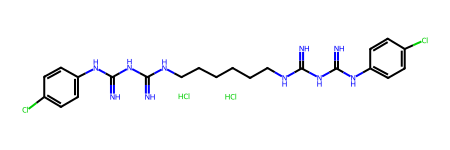

------------------------------

Ukupno obrađeno molekula iz 451 SDF fajlova.


In [2]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import display
import os

# --- Konfiguracija ---
# Zamenite sa putanjom do direktorijuma koji sadrži vaše SDF fajlove
sdf_directory = 'data/aa/TOX21_ERa_BLA_Agonist_ratio-ESR1' 

# Maksimalan broj molekula za prikazivanje (da ne bi preopteretio notebook)
max_display_molecules = 5 

# --- Obrada svih SDF fajlova u direktorijumu ---
print(f"Preuzimanje i analiza SDF fajlova iz direktorijuma: {os.path.abspath(sdf_directory)}\n")

if not os.path.isdir(sdf_directory):
    print(f"Greška: Direktorijum '{sdf_directory}' ne postoji.")
else:
    processed_count = 0
    display_count = 0

    for filename in os.listdir(sdf_directory):
        if filename.endswith(".sdf"):
            file_path = os.path.join(sdf_directory, filename)
            print(f"Procesiram fajl: {filename}")
            
            try:
                suppl = Chem.SDMolSupplier(file_path, sanitize=True, removeHs=False)
                molecules_in_file = [mol for mol in suppl if mol is not None]

                if not molecules_in_file:
                    print(f"  Nema validnih molekula u {filename}.")
                    continue

                processed_count += len(molecules_in_file)

                # Prikazivanje samo ograničenog broja molekula za demo
                if display_count < max_display_molecules:
                    print(f"  Prikazujem prvi molekul iz {filename}:")
                    first_mol = molecules_in_file[0]
                    print(f"    SMILES: {Chem.MolToSmiles(first_mol)}")
                    # Prikazivanje specifičnog propertija ako je poznat, npr. 'DTXSID'
                    if first_mol.HasProp('DTXSID'):
                        print(f"    DTXSID: {first_mol.GetProp('DTXSID')}")
                    
                    display(first_mol)
                    display_count += 1
                else:
                    print(f"  (Preskačem prikazivanje iz {filename} - dostignut limit prikaza)")
                
            except Exception as e:
                print(f"  Greška pri obradi {filename}: {e}")
            
            print("-" * 30) # Separator

    print(f"\nUkupno obrađeno molekula iz {processed_count} SDF fajlova.")
    if processed_count > 0 and display_count == 0:
        print("Napomena: Nijedan molekul nije prikazan jer je dostignut 'max_display_molecules' limit pre početka prikaza.")

In [4]:
import os

# --- Konfiguracija (Obavezno promenite ove putanje!) ---
folder1_path = 'data/aa/TOX21_ERa_BLA_Agonist_ratio-ESR1/mol_files'
folder2_path = 'data/aa/Tox21_ERa_BLA_Antagonist_ratio-ESR1/mol_files' 

# --- Funkcija za dobijanje imena fajlova ---
def get_filenames_in_folder(folder_path):
    """
    Vraća set imena svih fajlova (bez putanje) u datom folderu.
    """
    filenames = set()
    if not os.path.isdir(folder_path):
        print(f"Upozorenje: Direktorijum '{folder_path}' ne postoji.")
        return filenames
    
    for item in os.listdir(folder_path):
        item_path = os.path.join(folder_path, item)
        if os.path.isfile(item_path): # Proveravamo samo fajlove, ne poddirektorijume
            filenames.add(item)
    return filenames

# --- Izvršavanje provere ---
print(f"Proveravam folder 1: {os.path.abspath(folder1_path)}")
print(f"Proveravam folder 2: {os.path.abspath(folder2_path)}\n")

# Dobijanje imena fajlova iz oba foldera
filenames_folder1 = get_filenames_in_folder(folder1_path)
filenames_folder2 = get_filenames_in_folder(folder2_path)

# Broj fajlova u svakom folderu
count_folder1 = len(filenames_folder1)
count_folder2 = len(filenames_folder2)

# Pronalaženje podudarnih imena fajlova
# Korišćenje operacije preseka (intersection) nad setovima je najefikasnije
matching_filenames = filenames_folder1.intersection(filenames_folder2)
count_matching = len(matching_filenames)

# --- Prikaz rezultata ---
print(f"Ukupan broj fajlova u folderu '{os.path.basename(folder1_path)}': {count_folder1}")
print(f"Ukupan broj fajlova u folderu '{os.path.basename(folder2_path)}': {count_folder2}\n")

print(f"Broj fajlova čija se imena poklapaju u oba foldera: {count_matching}")

if count_matching > 0:
    print("\nImena podudarnih fajlova:")
    for filename in sorted(list(matching_filenames)): # Sortiranje za bolju čitljivost
        print(f"- {filename}")
else:
    print("Nema fajlova sa podudarnim imenima u ova dva foldera.")

print("\nProvera završena.")

Proveravam folder 1: /home/ivana-milutinovic/Documents/Doktorske/BIORad/bio-inf-paper/data-processing/data/aa/TOX21_ERa_BLA_Agonist_ratio-ESR1/mol_files
Proveravam folder 2: /home/ivana-milutinovic/Documents/Doktorske/BIORad/bio-inf-paper/data-processing/data/aa/Tox21_ERa_BLA_Antagonist_ratio-ESR1/mol_files

Ukupan broj fajlova u folderu 'mol_files': 451
Ukupan broj fajlova u folderu 'mol_files': 1051

Broj fajlova čija se imena poklapaju u oba foldera: 197

Imena podudarnih fajlova:
- (1,1,3,3-Tetramethylbutyl)phenol.mol
- (2,4,6-Trioxo-1,3,5-triazinane-1,3,5-triyl)triethane-2,1-diyl trisprop-2-enoate.mol
- (Acryloyloxy)(tributyl)stannane.mol
- (Z)-4-Hydroxytamoxifen.mol
- 1,2-Benzenedicarboxaldehyde.mol
- 1,3-Didecyl-2-methylimidazolium chloride.mol
- 1,8-Dihydroxy-4,5-dinitroanthraquinone.mol
- 1-Butyl-4-methylpyridinium chloride.mol
- 1-Ethoxy-4-nitrobenzene.mol
- 1-Ethyl-3-methyl-1H-imidazol-3-ium diethyl phosphate.mol
- 1-Hexadecyl-3-methylimidazolium bis(trifluoromethylsulfonyl)